<a href="https://colab.research.google.com/github/CollegePredictor/MachineLearning-Project/blob/main/Mini_Project_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Before Executing the below cells make sure to upload all the required Data sets by clicking on the folder icon on left side and upload to session storage

##Data Collection


In [ ]:
import pandas as pd

df1=pd.read_excel('2016.xlsx')
df2=pd.read_excel('2017.xlsx')
df3=pd.read_excel('2018.xlsx')
df4=pd.read_excel('2019.xlsx')


##Data Preprocessing and Removing Unuseful data

In [ ]:
frames=[df1,df2,df3,df4]
result=pd.concat(frames)
result1=result.sort_values(['i_code','b_code','year'],ascending=[1,1,1])

In [ ]:
colleges19=set(df4['i_code'])
print(colleges19)
collegestill19=set(result1['i_code'])
print(collegestill19)
print("overall Colleges")
print(len(collegestill19))
closed_colleges=collegestill19-colleges19
print("Closed Colleges")
print(len(closed_colleges))
temp=result1.set_index('i_code')
for key in closed_colleges:
  temp=temp.drop(key)
temp.reset_index(inplace = True)
print("Resultant Colleges to Work On")
print(len(set(temp['i_code'])))
temp.to_csv('finaldata.csv')

{'CHTS', 'KGRH', 'VASV', 'AVIH', 'IITT', 'SDEW', 'METH', 'ASRA', 'GRRR', 'JMTS', 'BVRW', 'MLID', 'SRHP', 'AHTC', 'VMEG', 'MHVR', 'GNIT', 'CBIT', 'NRCM', 'ACEG', 'KPRT', 'BITN', 'DRKI', 'VREC', 'VITH', 'KITW', 'SDGI', 'KUCESF', 'SVES', 'ASOK', 'CITS', 'JNPASF', 'VBIT', 'SBIT', 'SKEC', 'RRST', 'VGSE', 'VMTW', 'SRIW', 'KITS', 'CVRH', 'MNRT', 'CMRM', 'NIET', 'VJYA', 'KTKM', 'VGNT', 'MVSR', 'KLRT', 'CVSR', 'ARJN', 'VCET', 'HITM', 'MREW', 'MECS', 'ANRH', 'GLOB', 'JNTH', 'SVSE', 'KCEA', 'VBEC', 'AURG', 'SWIT', 'JNTHMT', 'SPHN', 'ELET', 'JNTS', 'MRCW', 'SMSK', 'MREC', 'SPEC', 'MRET', 'SNTI', 'KUCE', 'SVIT', 'MRIT', 'KDDW', 'NNRG', 'VJEC', 'TPCE', 'GNPT', 'KNRR', 'TUDI', 'BREW', 'CMRP', 'CMRK', 'PRIW', 'INDI', 'TKEM', 'AURP', 'NETW', 'TCTK', 'CASR', 'MRCE', 'SPOP', 'SISG', 'BRIG', 'KUWL', 'BVRI', 'MINA', 'CHTN', 'MGUNSF', 'NGIT', 'GURU', 'SDES', 'GCTC', 'OUCE', 'JOGI', 'AITH', 'JMTK', 'JBIT', 'BIET', 'CDTK', 'MRCP', 'MTEC', 'BOSE', 'BRIL', 'MGIT', 'AVNI', 'VAGE', 'JNKR', 'JAYA', 'ANRK', 'BOMA',

In [ ]:
import pandas as pd
df=pd.read_excel('finaldata_e.xlsx')
df[df.columns] = df[df.columns].fillna(100)
df.to_csv('remove_nan.csv')

In [ ]:
df=df.iloc[:,3:]

In [ ]:
set_colleges=set(df['i_code'])

In [ ]:
colleges=list(set_colleges)
colleges.sort()

In [ ]:
cast=list(df.columns)
cast=cast[3:]

#Data Visualization over a Test Sample and Choosing right model

In [ ]:
#Working on Sample Data Set
x=[
   [2016],
   [2017],
   [2018],
   [2019],
]
y=[36354, 26904 ,21940, 25594]


#Linear Regression

[18387.]


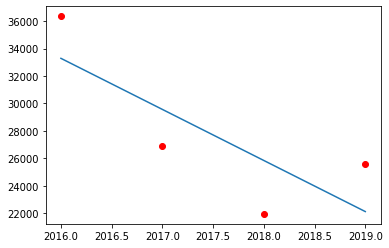

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
lin_reg = LinearRegression()
lin_reg.fit(x, y)
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg.predict(x))
print(lin_reg.predict([
                       [2020]
]))

##Polynomial Regression

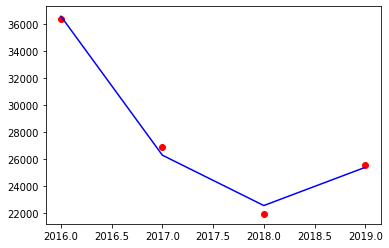

[34767.00000572]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.show()
print(lin_reg_2.predict(poly_reg.fit_transform([
                                                [2020]
])))

##Training Model

In [ ]:
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
df19=pd.read_excel('2019.xlsx')
fdf=pd.read_excel('2021.xlsx')
#c=0
for i in colleges:
  #print(i)
  #c+=1;
  #if(c==2):
    #break
  #Calculate all the branches of that college
  temp=df.set_index('i_code')
  temp1=temp.loc[i] #temp1 consist data of a ith college
  branches=set(temp1['b_code']) #branches of iht college
  for j in branches:
    #print(j)
    for k in cast:
      fil=(df['i_code']==i) & (df['b_code']==j ) #ith college jth branch
      temp2=df.loc[fil,['year',k]] #kth caste of ith college and jth branch
      x = temp2.iloc[:, 0:-1].values
      y = temp2.iloc[:, -1].values
      

      #Linear
      regressor = LinearRegression()
      regressor.fit(x, y)
      rank_pred_linear = regressor.predict([[2020]])


      #Poly
      poly_reg = PolynomialFeatures(degree = 2)
      x_poly = poly_reg.fit_transform(x)
      lin_reg_2 = LinearRegression()
      lin_reg_2.fit(x_poly, y)
      rank_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[2020]]))
      #add row [2021 i j k]


      filt=(fdf['i_code']==i) & (fdf['b_code']==j)
      filt1=(df19['i_code']==i) & (df19['b_code']==j)
      
      rank_19=df19.loc[filt1,k].values

      rank_pred_poly=float(rank_pred_poly.astype(float))
      rank_pred_linear=float(rank_pred_linear.astype(float))

      if((rank_pred_linear>rank_19*70/100) and (rank_pred_linear<(rank_19)*130/100)):
        fdf.loc[filt,k]=rank_pred_linear
      elif(rank_pred_poly>rank_19*70/100 and rank_pred_poly<rank_19*130/100):
        fdf.loc[filt,k]=rank_pred_poly
      else:
        fdf.loc[filt,k]=rank_19
fdf.to_csv('linear_poly_output.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not

In [ ]:
import pandas as pd
df=pd.read_excel('Master.xlsx')
print(type(df))
df[df.columns] = df[df.columns].fillna(-1)

<class 'pandas.core.frame.DataFrame'>


#Making Predictions


#Provide input for gender, caste, branch and distirct below

In [ ]:
#Rank is of type Number
#gender is 1 for male and 0 for female
#Caste is of type String
#Branch String
#dist id of type List of Strings, can have mutiple districts ex ['MDL','RR','HYD']

gender =1
cast='OC'
rank=1400
branch='CSE'
dis=['MDL']

if(gender==1):
  caste=cast +"_B"
else:
  caste=cast +"_G"

def func(k):
  for i in dis:
    print(k)
    print(type(k))
    break

filt=(df['b_code']==branch) & (df.dist.isin(dis))
output=df.loc[filt,['i_name',caste]]
filt1=((output[caste]>rank*40/100)) 

output=output.sort_values(caste)



#Display Output

#Output in the form of List of Colleges

In [ ]:
out=output.loc[filt1,'i_name'].head(20)
print(out)


303                      JNTU COLLEGE OF ENGG  HYDERABAD
309          JNTUH-5 YEAR INTEGRATED MTECH  SELF FINANCE
733       V N R VIGNAN JYOTHI INSTITUTE OF ENGG AND TECH
224        GOKARAJU RANGARAJU INSTITUTE OF ENGG AND TECH
603            SREENIDHI INSTITUTE OF SCI AND TECHNOLOGY
179              ANURAG GRP OF INSTNS- CVSR COLL OF ENGG
154                 C M R COLLEGE OF ENGG AND TECHNOLOGY
251                INSTITUTE OF AERONAUTICAL ENGINEERING
479            MALLAREDDY ENGINEERING COLLEGE AUTONOMOUS
160                          CMR INSTITUTE OF TECHNOLOGY
439                        M L R INSTITUTE OF TECHNOLOGY
445    MALLA REDDY COLLEGE OF ENGG  TECHNOLOGY (AUTON...
199            GEETANJALI COLLEGE OF ENGG AND TECHNOLOGY
519                        NEIL GOGTE INST OF TECHNOLOGY
697    VIGNAN BHARATI INSTITUTE OF TECHNOLOGY (AUTONO...
486    MALLA REDDY ENGINEERING COLLEGE AND MANAGEMENT...
451    MARRI LAXMAN REDDY INST OF TECHNOLOGY AND MANA...
149                            

#Output in the form of HTML table

In [ ]:
out=out.to_frame()
out.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>i_name</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>303</th>\n      <td>JNTU COLLEGE OF ENGG  HYDERABAD</td>\n    </tr>\n    <tr>\n      <th>309</th>\n      <td>JNTUH-5 YEAR INTEGRATED MTECH  SELF FINANCE</td>\n    </tr>\n    <tr>\n      <th>733</th>\n      <td>V N R VIGNAN JYOTHI INSTITUTE OF ENGG AND TECH</td>\n    </tr>\n    <tr>\n      <th>224</th>\n      <td>GOKARAJU RANGARAJU INSTITUTE OF ENGG AND TECH</td>\n    </tr>\n    <tr>\n      <th>603</th>\n      <td>SREENIDHI INSTITUTE OF SCI AND TECHNOLOGY</td>\n    </tr>\n    <tr>\n      <th>179</th>\n      <td>ANURAG GRP OF INSTNS- CVSR COLL OF ENGG</td>\n    </tr>\n    <tr>\n      <th>154</th>\n      <td>C M R COLLEGE OF ENGG AND TECHNOLOGY</td>\n    </tr>\n    <tr>\n      <th>251</th>\n      <td>INSTITUTE OF AERONAUTICAL ENGINEERING</td>\n    </tr>\n    <tr>\n      <th>479</th>\n      <td>MALLAREDDY ENGINE